In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber = pd.merge(ride, city, how = "left", on = "city")

# Display the data table for preview
pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
#group by city
citygroup = pyber.groupby(["city"])
citygroup.head()

#avg fare per city
avgfare = citygroup["fare"].mean()
avgfare.head()
avgfare_df = pd.DataFrame(avgfare)
avgfare_df

#total # of rides per city
totalrides = citygroup["ride_id"].count()
totalrides.head()
totalrides_df = pd.DataFrame(totalrides)
totalrides_df

#the city already has the city type and the driver count so I'm going to merge the dataframes into one
city_df = pd.merge(city,avgfare_df, on="city")
city_df1 = pd.merge(city_df,totalrides_df, on="city")
city_df1.head()

#seperate into dataframes based on city type
urban = (city_df1.query("type == 'Urban'"))
urban_df = urban[["city", "driver_count", "type", "fare", "ride_id"]]
suburban = (city_df1.query("type == 'Suburban'"))
suburban_df = suburban[["city", "driver_count", "type", "fare", "ride_id"]]
rural = (city_df1.query("type == 'Rural'"))
rural_df = rural[["city", "driver_count", "type", "fare", "ride_id"]]
rural.head()


,city,driver_count,type,fare,ride_id
102,South Jennifer,7,Rural,35.264286,7
103,West Heather,4,Rural,33.890000,9
104,Newtonview,1,Rural,36.745000,4
105,North Holly,8,Rural,29.130000,9
106,Michaelberg,6,Rural,34.997500,12


## Bubble Plot of Ride Sharing Data

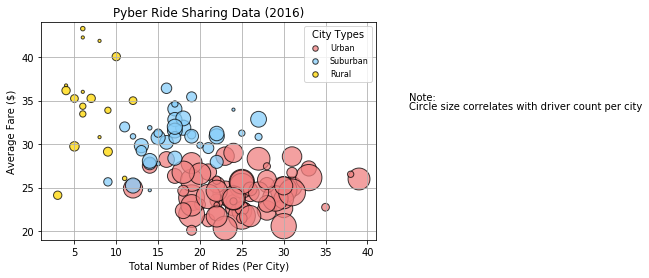

In [3]:
# Obtain the x and y coordinates for each of the three city types
plt.ylim(19,44)
plt.xlim(1,41)

# Build the scatter plots for each city types
x_axisu = urban_df["ride_id"]
x_axisu
y_axisu = urban_df["fare"]
y_axisu
dcu = urban_df["driver_count"]
dcu
x_axiss = suburban_df["ride_id"]
y_axiss = suburban_df["fare"]
dcs = suburban_df["driver_count"]
x_axisr = rural_df["ride_id"]
y_axisr = rural_df["fare"]
dcr = rural_df["driver_count"]
urban = plt.scatter(x_axisu, y_axisu, marker="o",facecolors="lightcoral", 
                     edgecolors="black",s=10*dcu, alpha=0.75)
suburban = plt.scatter(x_axiss, y_axiss, marker="o",facecolors="lightskyblue", 
                     edgecolors="black",s=10*dcs, alpha=0.75)
rural = plt.scatter(x_axisr, y_axisr, marker="o",facecolors="gold", 
                     edgecolors="black",s=10*dcr, alpha=0.75)
plt.grid()

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
# plt.legend(loc="upper right")
lgnd = plt.legend(['Urban', 'Suburban', 'Rural'], scatterpoints=1, frameon=True, fontsize=8,labelspacing=0.5, title='City Types')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(45,35,"Note:")
plt.text(45,34,"Circle size correlates with driver count per city")

# Save Figure
plt.savefig("JLT Pyber Ride Sharing Data Bubble.png", bbox_inches="tight")
plt.show()

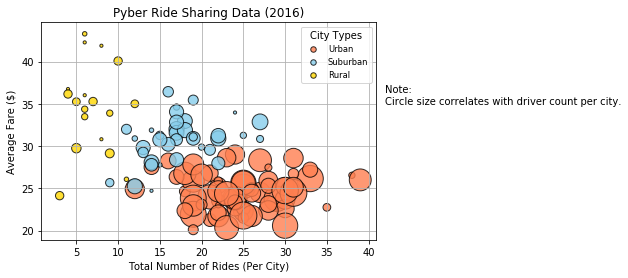

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

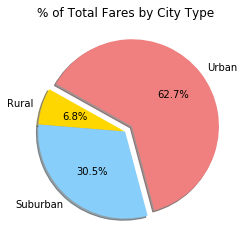

In [4]:
# Calculate Type Percents
totalfares = pyber["fare"].sum()
totalfares
fare_u = pyber.query("type =='Urban'")
fareu = fare_u["fare"].sum()
pfu = fareu / totalfares
fare_s = pyber.query("type =='Suburban'")
fares = fare_s["fare"].sum()
pfs = fares / totalfares
fare_r = pyber.query("type =='Rural'")
farer = fare_r["fare"].sum()
pfr = farer / totalfares

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Rural","Suburban"]
# The values of each section of the pie chart
sizes = [pfu,pfr,pfs]
# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]
#explode Urban
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=285)
#title for pie chart
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("JLT Total Fares by City Type.png")
plt.show()

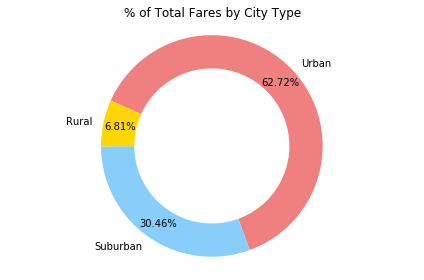

In [34]:
#try different aesthetics
labels = ["Urban", "Rural","Suburban"]
sizes = [pfu,pfr,pfs]
colors = ["lightcoral", "gold", "lightskyblue"]
#the pctdistance puts the percentages in the circle and w/o it will be inside the center circle
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=False, pctdistance=0.85, startangle=290)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("% of Total Fares by City Type")
plt.axis('equal')
plt.tight_layout()
plt.show()

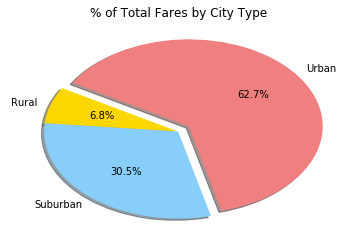

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

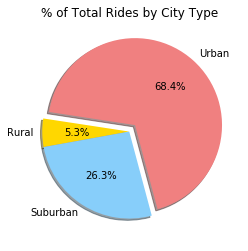

In [7]:
# Calculate Ride Percents
totalcity = len(pyber["ride_id"].unique())
totalcity
totalu = len(pyber.query("type =='Urban'"))
pu = totalu / totalcity
totals = len(pyber.query("type =='Suburban'"))
ps = totals / totalcity
totalr = len(pyber.query("type =='Rural'"))
pr = totalr / totalcity

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Rural","Suburban"]
# The values of each section of the pie chart
sizes = [pu,pr,ps]
# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]
#explode Urban
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=285)
#title for pie chart
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("JLT Total Rides by City Type.png")
plt.show()

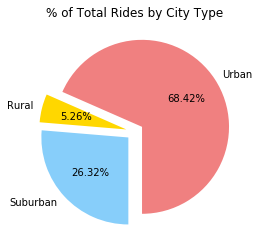

In [8]:
#try different aesthetics2, explode
labels = ["Urban", "Rural","Suburban"]
sizes = [pu,pr,ps]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0.1, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=False, startangle=270)
plt.title("% of Total Rides by City Type")
plt.show()

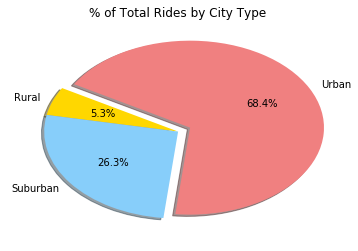

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

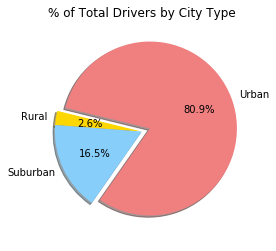

In [9]:
# Calculate Driver Percents
totaldriveres = city["driver_count"].sum()
totaldriveres
driver_u = city.query("type =='Urban'")
driveru = driver_u["driver_count"].sum()
du = driveru / totaldriveres
driver_s = city.query("type =='Suburban'")
drivers = driver_s["driver_count"].sum()
ds = drivers / totaldriveres
driver_r = city.query("type =='Rural'")
driverr = driver_r["driver_count"].sum()
dr = driverr / totaldriveres

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Rural","Suburban"]
# The values of each section of the pie chart
sizes = [du,dr,ds]
# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]
#explode Urban
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=235)
#title for pie chart
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("JLT Total Drivers by City Type.png")
plt.show()

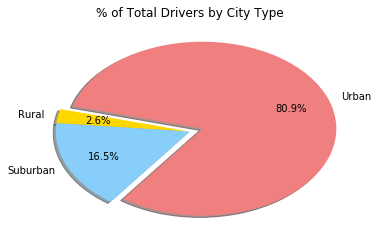

In [6]:
# Show Figure
plt.show()